# Manipulando dados direto da Infraero

Queremos encontrar uma série histórica com o número de pousos (pouso_brasil) e decolagens (decolagem_brasil).

# Parte 1: Buscando dado no site da Infraero

In [1]:
#Planilha de acompanhamento de pousos nos aeroportos da Infraero
#Dados mensais referente a pousos e decolagens, nacionais e internacionais
#site: https://transparencia.infraero.gov.br/estatisticas/

#abas da planilha:
#Aeronaves
#Carga Aérea
#Correios
#Passageiros

import pandas as pd

# Parte 2: Limpeza e manipulação da base

In [2]:
def limpeza_dados(base_1): #recebe um dataframe
    #Extraindo informações relevantes
    vigencia_dados=base_1.iloc[1,1]#informação sobre qual o mês utilizado na mensuração desse resultado
    elaborada_dados=base_1.iloc[2,7]#informação sobre quando foi finalizada essa planilha

    #Dando uma primmeira limpeza na base
    base_1 = base_1.dropna(how='all').dropna(how='all', axis=1)#remove todas linhas e colunas vazias

    #Coletando a coluna verdadeira e aletrando o nome
    a=base_1.iloc[3,:]
    base_1.columns=a

    #Dando segunda limpeza de valores missing
    base_1.drop(labels=[0,1,2,3],axis=0,inplace=True)

    #Ajustando o índice
    base_1.index=range(base_1.shape[0])
    
    return base_1,vigencia_dados,elaborada_dados

Infelizmente nossos dados estão em formato distinto do esperado, como mostrado abaixo. Precisamos trocar os valores object por numéricos nos campos quantitativos.

In [3]:
#Você pode vizualizar os valores int como object no comando abaixo
#base_1.info()

In [4]:
#Vamos remover os espaços vazios dos títulos da coluna
def remove_vazio(x): #recebe um dataframe
    a=[]
    for i in list(x.columns):
        a.append(i.strip()) #função .strip() apaga valores vazios na string no inicio e fim
    x.columns=a
    return x #retorna o mesmo dataframe com nome de colunas livre de espaços vazios

In [5]:
#removendo espaços fazios
#base_1=remove_vazio(base_1)

In [6]:
#Vamos converter as colunas
#como estamos tratando de contagens trasnformaremos em valores Int
def para_numero(x):#recebe um dataframe
    a=list(x.columns)
    for i in range(1,len(a)):
        x[a[i]] = x[a[i]].astype(int, errors = 'raise')
    return x

In [7]:
#convertendo valores do dataframe para Int
#base_1=para_numero(base_1)
#base_1.info()

# Parte 3: extrair os nomes dos grupos (aeroportos)

In [8]:
#inicia no 0
#pula 8 + 1 (conjunto aberto)
#valor final: total de linhas - 8
def nome_aeroportos(base_1): #recebe um dataframe
    endereco_final=base_1.shape[0]-8
    airport=[]
    position_airport=[]
    pouso_und={}
    for i in range(0,base_1.shape[0],9):
        if i<=endereco_final:
            a=base_1.iloc[i,0]
            airport.append(a)
            position_airport.append(i) #guarda a posição no data frame
        else:
            break
    return airport, position_airport
#variável airport contém os nomes dos aeroportos descritos no período (mensal)

# Parte 4: coletando dados de pousos mensais

4.1 Somatória por aeroporto (pouso_und)

In [9]:
#Faremos um dicionário contendo total de pousos no mês
#chave é o aeroporto; valor é o total de pousos
#dict[ key ] = value
def pouso_por_aeroporto(airport,position_airport,base_1):
    pouso_und={}
    for i in range(len(airport)):
        linha=position_airport[i]
        total_pouso=base_1.iloc[linha,1]
        pouso_und[airport[i]]=total_pouso
    return pouso_und

In [10]:
#tutorial dicionário Python da Kenzie Academy
#https://kenzie.com.br/blog/dicionario-python/#:~:text=Para%20criar%20um%20dicion%C3%A1rio%20em,armazenados%20de%20forma%20n%C3%A3o%20ordenada.

4.2 Somar total de pousos nos aeroportos no mês (total_pouso)

In [11]:
def pouso_total_mes(pouso_und): #recebe um dicionário
    total_pouso = sum(pouso_und.values())
    return total_pouso

# Parte 5: Coletando dados de decolagem mensal

4.1 Somatória por aeroporto (decolagem_und)

In [12]:
#Faremos um dicionário contendo total de decolagens no mês
#chave é o aeroporto; valor é o total de decolagens
#dict[ key ] = value
def decolar_por_aeroporto(airport,position_airport,base_1):
    decolagem_und={}
    for i in range(len(airport)):
        linha=position_airport[i]
        total_decolagem=base_1.iloc[linha,3]
        decolagem_und[airport[i]]=total_decolagem
    return decolagem_und

4.2 Somar total de decolagens nos aeroportos no mês (total_decolagem)

In [13]:
def decolar_total_mes(decolagem_und):
    total_decolagem = sum(decolagem_und.values())
    return total_decolagem

# Parte 6: Salvar o período do dado

In [14]:
def mes_referencia(z,y):
    send_data=z[-10:] #data em que a infraero terminou de montar a planilha; considero esta data como sendo a data de envio para o site
    a=send_data[3:5]
    mes_dado=int(a)-1
    ano_dado=y[-4:]
    periodo_ref=str(mes_dado)+"/"+ano_dado
    return periodo_ref

# Parte 7: Salvando pousos e decolagem mensais em um dataframe com todo o historico

# Parte 7.1 Robô para dados da Infraero

Tutoriais

In [15]:
"https://www.youtube.com/watch?v=QdLgNr1mKQU"
"https://imasters.com.br/back-end/aprendendo-sobre-web-scraping-em-python-utilizando-beautifulsoup"

'https://imasters.com.br/back-end/aprendendo-sobre-web-scraping-em-python-utilizando-beautifulsoup'

In [16]:
import requests
from bs4 import BeautifulSoup

# Parte 7.1.1 Capturando o código fonte da página com o Request

In [17]:
link='https://transparencia.infraero.gov.br/estatisticas/'

In [18]:
infraero=requests.get(link) #faz a requisição da página HTNL
#infraero.status_code informa se a requisição foi um sucesso (200)
#infraero.content mostra o conteúdo da página (código)

# Parte 7.1.2 Decodificando o conteúdo da página com BeautifulSoup

In [19]:
#vamos criar uma instância da classe Beautifulsoup
soup = BeautifulSoup(infraero.content, 'html.parser')

#exibe o conteúdo da página formatado corretamente
#print(soup.prettify())

#retorna os níveis mais altos da página
#list(soup.children)

#vamos ver o tipo de cada elemento na lista
[type(item) for item in list(soup.children)]

[bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

In [20]:
#Como o elemento Tag é o mais importante é com ele que iremos trabalhar
html = list(soup.children)[2]
#como cada elemento em html é do tipo BS4 utilizaremos o mesmo esquema com children  
#list(html.children)
#[type(item) for item in list(html.children)] aqui descobrimos quantas tag nos temos

body = list(html.children)[3]

# Parte 7.1.3 Capturando um índice sobre os atributos dos dados da Infraero

In [21]:
#1. Capturar um manual sobre os atributos dos dados
lista_ul=[]
for i in body.find_all('ul'):
    lista_ul.append(i.get_text())
    #print(f"{i.get_text()}\n")
manual=lista_ul[21].split("\n") #dados separados por \n
manual=manual[1:6]
manual

['Transporte Regular: voo efetuado com a existência de HOTRAN, assim definido pelo órgão regulador de acordo com a Portaria Nº 569/GC5, de 05/09/2000.',
 'Transporte Não Regular: voo comercial efetuado por qualquer aeronave sem a existência de HOTRAN.',
 'Passageiros Embarcados: passageiros de origem, que iniciam a viagem no aeroporto, somados aos passageiros em conexão.',
 'Passageiros Desembarcados: passageiros de destino, que terminam a viagem no aeroporto, somados aos passageiros em conexão.',
 'Passageiros de Cabotagem: passageiros domésticos transportados em voo internacional.']

# Parte 7.1.4 Capturando os links

In [22]:
link_url=[]
for i in body.find_all('tbody'):
    link_url.append(i)
    #print(f"{i}\n")
#str(link_url[0])

In [23]:
link_string=str(link_url[0])

In [24]:
#Capturando uma lista com os anos
ano=[]
atual=2022 # dar algum jeito de automatizar
comeco=2012
for i in range(atual-comeco+1):
    ano.append(i+comeco)

In [25]:
c = 'href='
d="/wp"
e=".xlsx"
f=".xls"
segundo=0
count=0
link=[]
tempo=len(link_string)    
recarregar_texto=link_string


while count<=tempo:
    if count==0:
        s = recarregar_texto[segundo:]#parte do texto de inicio em cada rodada
    else:
        s = recarregar_texto        
    try:
        a=s.index(c)
    except:
        break
    #link_string[a:a+5]
    novo_texto=recarregar_texto[a:]#vamos pegar de href= em diante (até o final)
    try:
        primeiro=novo_texto.index(d)
        segundo=novo_texto.index(e)
    except:
        segundo=novo_texto.index(f)
    endereco=novo_texto[primeiro:segundo+5]
    link.append(endereco)
    recarregar_texto=novo_texto[segundo:]
    count+=1


#corta tudo atrás do 51
#acha a posição do primeiro"
#acha a posição de .xlsx"
#teria que começar a partir do segundo em cada rodada para não repetir

# Iniciando chamadas

In [26]:
#variáveis com somatórios de todos os aeroportos
pouso_brasil={}
decolagem_brasil={}
cabeca="https://transparencia.infraero.gov.br"
pouso=[]
decolagem=[]

In [27]:
#motor do robô
#trazendo a base da internet

for i in range(len(link)):
    try:
        base=pd.read_excel(cabeca+link[i],sheet_name="Aeronaves") #abrindo aba 1: Aeronaves
        #1. Limpeza de dados
        base,vigencia_dados,elaborada_dados=limpeza_dados(base)
        base=remove_vazio(base)
        base=para_numero(base)
        # 2. Nome e posição dos aeroportos na base
        aeroportos, index_air=nome_aeroportos(base) #lista dos aeroportos e um indice deles no dataframe original
        # 3. Dados de pousos mensais
        pouso_und=pouso_por_aeroporto(aeroportos,index_air,base)#dicionrio com dados para cada aeroporto
        total_pouso=pouso_total_mes(pouso_und) #número de pousos no mes
        # 4. Dados de decolaagem mensais
        decolagem_und=decolar_por_aeroporto(aeroportos,index_air,base)
        total_decolagem=decolar_total_mes(decolagem_und)
        # 5. Salvando o período do dado
        periodo_ref=mes_referencia(elaborada_dados,vigencia_dados)
        print(periodo_ref)
        #6. salvando um série histórica do número de pousos e decolagem mensais totais
        #pouso_brasil[periodo_ref]=total_pouso
        #decolagem_brasil[periodo_ref]=total_decolagem
        pouso.append(total_pouso)
        decolagem.append(total_decolagem)
    except:
        continue

7/2022
7/2022
7/2022
7/2022
7/2022
7/2022
7/2022
8/2022
1/2021
1/2021
1/2021
1/2021
1/2021
1/2021
1/2021
1/2021
1/2021
1/2021
1/2021
1/2021
9/2020
9/2020
9/2020
9/2020
9/2020
9/2020
9/2020
9/2020
9/2020
9/2020
9/2020
9/2020
1/2019
1/2019
1/2019
1/2019
1/2019
1/2019
1/2019
1/2019
1/2019
1/2019
1/2019
1/2019


Pousos

#Acima precisamos ver porque não está saindo do mes de julho 

# Vizualização gráfica

In [28]:
import matplotlib.pyplot as plt

<BarContainer object of 54 artists>

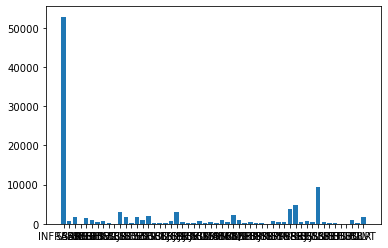

In [29]:
plt.bar(pouso_und.keys(),pouso_und.values())

In [30]:
print(len(pouso))
print(len(decolagem))
print(len(link))

44
44
144


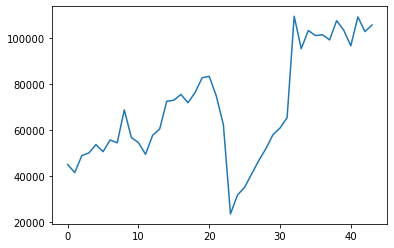

In [31]:
plt.plot(pouso)
#plt.plot(decolagem)
plt.show()

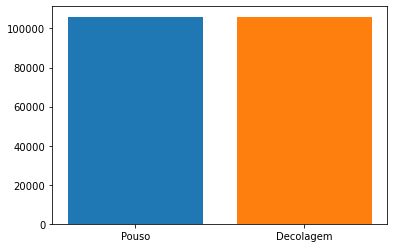

Diferença entre decolagem e pouso: 296


In [32]:
plt.bar("Pouso",total_pouso)
plt.bar("Decolagem",total_decolagem)
plt.show()
print(f"Diferença entre decolagem e pouso: {total_decolagem-total_pouso}")